### Task
Implemented ResNet32 or 50 architecture (you are allowed to used existing implementation in
keras framework) and evaluate the performance of the model on Tiny ImageNet dataset


Dataset source: https://www.kaggle.com/akash2sharma/tiny-imagenet

In [15]:
import tensorflow as tf
from tensorflow.keras.models import load_model,Sequential,Model
from tensorflow.keras.applications import ResNet50,VGG16,resnet50
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling1D,GlobalAveragePooling2D, Embedding, Flatten, Input, add,concatenate
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import cv2
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
img=cv2.imread("/home/kashraf/fall2021_coursework/Neural Nets/Assignment3/tiny_image_net/train/n01641577/n01641577_7.JPEG")

In [4]:
img.shape

(64, 64, 3)

In [5]:
input_shape=tf.keras.Input(shape=(64,64,3))
res_model=ResNet50(include_top=False, weights=None,input_tensor=input_shape)
print("----------------------Resnet50 Archttecure-----------------------------")
print(res_model.summary())


----------------------Resnet50 Archttecure-----------------------------
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
___________________

## Let's add full connected layer to our model and softmax activation function

In [6]:
model = Sequential()
model.add(res_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(200, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
Total params: 23,997,512
Trainable params: 23,944,392
Non-trainable params: 53,120
_________________________________________________________________
None


### Load and Prepare dataset

In [7]:
scale=1./255
train_dir="/home/kashraf/fall2021_coursework/Neural Nets/Assignment3/tiny_image_net/train/"
test_dir=  "/home/kashraf/fall2021_coursework/Neural Nets/Assignment3/tiny_image_net/test/"

train_gen=ImageDataGenerator(rescale=scale)
test_gen=ImageDataGenerator(rescale=scale)


train_generator=train_gen.flow_from_directory(train_dir,target_size=(64,64),batch_size=32)
test_generator=test_gen.flow_from_directory(test_dir,target_size=(64,64),batch_size=32)


print("Train shape:",train_generator.image_shape)
print("Test shape:",test_generator.image_shape)

Found 70000 images belonging to 200 classes.
Found 30000 images belonging to 200 classes.
Train shape: (64, 64, 3)
Test shape: (64, 64, 3)


In [8]:
train_generator.batch_size

32

In [9]:
checkpoint = ModelCheckpoint("Resnet50_V2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [ checkpoint,reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])


epochs = 100

batch_size=train_generator.batch_size
history= model.fit(train_generator,epochs = epochs,
                   callbacks = callbacks,
                   batch_size=batch_size,
                   validation_data = test_generator)


Epoch 1/100
2187/2188 [============================>.] - ETA: 0s - loss: 5.8495 - accuracy: 0.0135
Epoch 00001: val_loss improved from inf to 5.59056, saving model to Resnet50_V2.h5
2188/2188 [==============================] - 72s 33ms/step - loss: 5.8490 - accuracy: 0.0135 - val_loss: 5.5906 - val_accuracy: 0.0262 - lr: 0.0010
Epoch 2/100
2187/2188 [============================>.] - ETA: 0s - loss: 4.9350 - accuracy: 0.0343
Epoch 00002: val_loss did not improve from 5.59056
2188/2188 [==============================] - 69s 31ms/step - loss: 4.9350 - accuracy: 0.0343 - val_loss: 32.2069 - val_accuracy: 0.0264 - lr: 0.0010
Epoch 3/100
2187/2188 [============================>.] - ETA: 0s - loss: 4.5436 - accuracy: 0.0711
Epoch 00003: val_loss did not improve from 5.59056
2188/2188 [==============================] - 69s 32ms/step - loss: 4.5436 - accuracy: 0.0712 - val_loss: 5.9232 - val_accuracy: 0.0889 - lr: 0.0010
Epoch 4/100
2188/2188 [==============================] - ETA: 0s - loss: 

Epoch 26/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2768 - accuracy: 0.4293
Epoch 00026: val_loss did not improve from 3.90370
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2769 - accuracy: 0.4293 - val_loss: 108.7459 - val_accuracy: 0.2936 - lr: 1.2800e-08
Epoch 27/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2726 - accuracy: 0.4280
Epoch 00027: val_loss did not improve from 3.90370
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2727 - accuracy: 0.4280 - val_loss: 140.4881 - val_accuracy: 0.2929 - lr: 1.2800e-08
Epoch 28/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2735 - accuracy: 0.4278
Epoch 00028: val_loss did not improve from 3.90370

Epoch 00028: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2734 - accuracy: 0.4278 - val_loss: 132.8247 - val_accuracy: 0.2928 - lr: 1.2800e-08
Epo

Epoch 51/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2748 - accuracy: 0.4281
Epoch 00051: val_loss did not improve from 3.90370
2188/2188 [==============================] - 68s 31ms/step - loss: 2.2747 - accuracy: 0.4281 - val_loss: 141.5294 - val_accuracy: 0.2924 - lr: 3.2768e-14
Epoch 52/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2760 - accuracy: 0.4301
Epoch 00052: val_loss did not improve from 3.90370

Epoch 00052: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
2188/2188 [==============================] - 68s 31ms/step - loss: 2.2761 - accuracy: 0.4301 - val_loss: 143.4003 - val_accuracy: 0.2926 - lr: 3.2768e-14
Epoch 53/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2777 - accuracy: 0.4272
Epoch 00053: val_loss did not improve from 3.90370
2188/2188 [==============================] - 68s 31ms/step - loss: 2.2776 - accuracy: 0.4272 - val_loss: 133.6542 - val_accuracy: 0.2922 - lr: 6.5536e-15
Epoc

Epoch 76/100
2187/2188 [============================>.] - ETA: 0s - loss: 2.2737 - accuracy: 0.4302
Epoch 00076: val_loss did not improve from 3.90370

Epoch 00076: ReduceLROnPlateau reducing learning rate to 1.6777218395803187e-20.
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2736 - accuracy: 0.4302 - val_loss: 134.6293 - val_accuracy: 0.2930 - lr: 8.3886e-20
Epoch 77/100
2188/2188 [==============================] - ETA: 0s - loss: 2.2697 - accuracy: 0.4313
Epoch 00077: val_loss did not improve from 3.90370
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2697 - accuracy: 0.4313 - val_loss: 145.1281 - val_accuracy: 0.2923 - lr: 1.6777e-20
Epoch 78/100
2188/2188 [==============================] - ETA: 0s - loss: 2.2742 - accuracy: 0.4282
Epoch 00078: val_loss did not improve from 3.90370
2188/2188 [==============================] - 69s 31ms/step - loss: 2.2742 - accuracy: 0.4282 - val_loss: 142.9228 - val_accuracy: 0.2926 - lr: 1.6777e-20
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


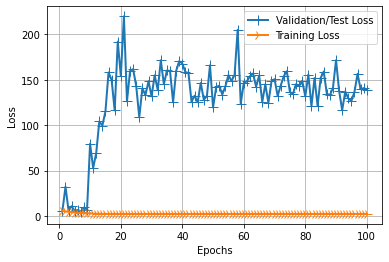

In [10]:
print(history.history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss_Resnet50_tiny_q1.png', dpi = 1200)
plt.show()

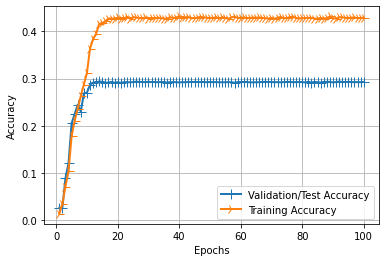

In [11]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy_resnet50_q1.png', dpi = 1200)
plt.show()

In [19]:
import seaborn as sr
import pandas as pd

y_pred=np.argmax(model.predict(test_generator), axis=1)
y_test=test_generator.classes


# y_predict,distances1=  face_recognition(x_test_recog,T_distance)
# accuracy=accuracy_score(y_test_recog,y_predict)
# class_names=["Bedroom","Building","Store","Industry","Living room","Kitchen","Highway",'Coast',
#              "Office","Mountain","Inside city","Forest","Surbub","Street","Opencountry"]
# report=classification_report(y_test,y_pred)

# conf=confusion_matrix(y_test,y_pred,normalize="true")
# conf_df=pd.DataFrame(conf)
# # print("\nFace  accuracy =",accuracy)
# # print("\n Classification report: \n",report)
# fig=plt.figure(figsize=(15,10))
# sr.heatmap(conf_df,annot=True,cmap="Blues")
# plt.title("Confusion matrix")
# plt.show()

In [24]:
accuracy=accuracy_score(y_test,y_pred)
Loss,accuracy= model.evaluate(test_generator)
print("Validation Accuracy:",accuracy)

938/938 [==============================] - 8s 8ms/step - loss: 139.0765 - accuracy: 0.2930
Validation Accuracy: 0.29296666383743286
